In [172]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [173]:
ROESSLER_LYAPUNOV = 1

In [174]:
del_t = 0.01
u = data.generate_roessler(del_t=del_t, steps=10000, washout=3000)
T = u.shape[0]
time = np.arange(T) * del_t * ROESSLER_LYAPUNOV

Text(0, 0.5, 'Phase Space')

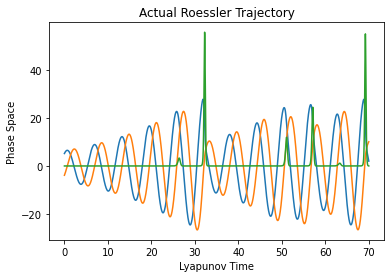

In [175]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 0], label="x")
plt.plot(time, u[:, 1], label="y")
plt.plot(time, u[:, 2], label="z")
plt.title("Actual Roessler Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Autocorrelation')

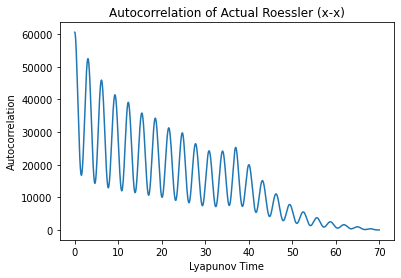

In [176]:
acfs = acf.compute_acfs(u, "x", "x")
plt.figure(facecolor="white")
plt.plot(time, acfs)
plt.title("Autocorrelation of Actual Roessler (x-x)")
plt.xlabel("Lyapunov Time")
plt.ylabel("Autocorrelation")

In [177]:
seed = 42
# modification to z because of mountain
u_mod = np.ndarray(u.shape)
u_mod[:, 0] = u[:, 0]
u_mod[:, 1] = u[:, 1]
u_mod[:, 2] = np.log(u[:, 2])
W_out, r, A, W_in = res.train_p(u, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
test_preds = res.predict(u[0], W_out, T, A, W_in)
# test_preds[:, 2] = np.exp(test_preds[:, 2])

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


Text(0, 0.5, 'Phase Space')

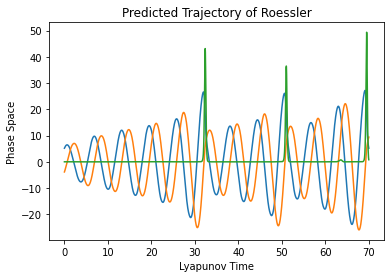

In [178]:
plt.figure(facecolor="white")
plt.plot(time, test_preds[:, 0], label="x")
plt.plot(time, test_preds[:, 1], label="y")
plt.plot(time, test_preds[:, 2], label="z")
plt.title("Predicted Trajectory of Roessler")
plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [179]:
error.RMSE(u, test_preds)

array([3.02994442, 2.84575259, 4.42745257])

Text(0, 0.5, 'Phase Space')

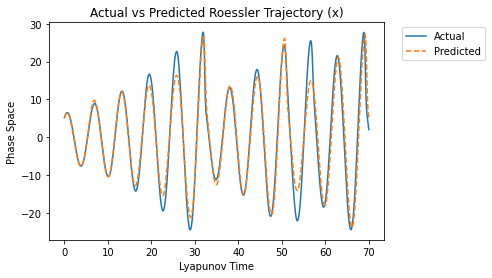

In [180]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 0], label="Actual")
plt.plot(time, test_preds[:, 0], label="Predicted", linestyle="dashed")

plt.legend(bbox_to_anchor=(1.04, 1))

plt.title("Actual vs Predicted Roessler Trajectory (x)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Phase Space')

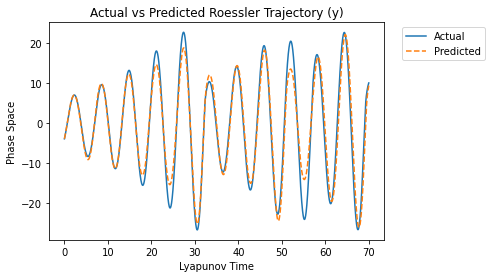

In [181]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 1], label="Actual")
plt.plot(time, test_preds[:, 1], label="Predicted", linestyle="dashed")

plt.legend(bbox_to_anchor=(1.04, 1))

plt.title("Actual vs Predicted Roessler Trajectory (y)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Phase Space')

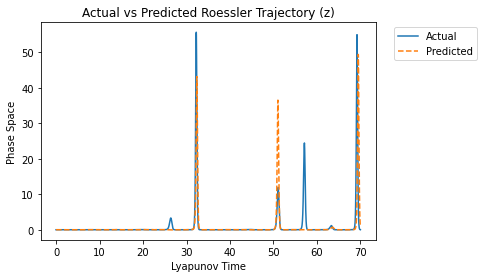

In [182]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 2], label="Actual")
plt.plot(time, test_preds[:, 2], label="Predicted", linestyle="dashed")

plt.legend(bbox_to_anchor=(1.04, 1))

plt.title("Actual vs Predicted Roessler Trajectory (z)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [183]:
moving_rmses = np.array([error.RMSE(u[:t], test_preds[:t]) for t in range(1, T)])

Text(0, 0.5, 'RMSE')

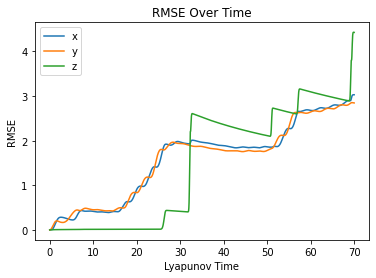

In [184]:
plt.figure(facecolor="white")
plt.plot(time[1:], moving_rmses[:, 0], label="x")
plt.plot(time[1:], moving_rmses[:, 1], label="y")
plt.plot(time[1:], moving_rmses[:, 2], label="z")

plt.title("RMSE Over Time")
plt.legend()

plt.xlabel("Lyapunov Time")
plt.ylabel("RMSE")

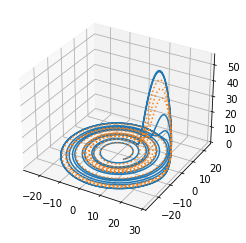

In [185]:
fig = plt.figure(facecolor="white")
ax = plt.axes(projection="3d")
ax.plot(
    u[:, 0],
    u[:, 1],
    u[:, 2]
)
ax.plot(
    test_preds[:, 0],
    test_preds[:, 1],
    test_preds[:, 2],
    linestyle="dotted"
)